In [1]:
import os

os.chdir("C:\\Users\\olya\\Downloads")

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
from ipywidgets import HTML
from ipyleaflet import Map, Marker, Popup

In [2]:
df = pd.read_csv('ALL_SPB_STOPS.CSV', sep=";", header = 0, index_col=False,encoding='Windows-1251')

In [3]:
df.insert(4,"S",0)

In [4]:
df.head()

,ID_STOP,STOP_NAME,LATITUDE,LONGITUDE,S
0,100101,Пр.Ветеранов-1,59.841604,30.253984,0
1,100102,Пр.Ветеранов-2,59.842042,30.250084,0
2,100103,Ленинский пр.-1,59.851683,30.268385,0
3,100104,Ленинский пр.-2,59.849710,30.268348,0
4,100105,Автово,59.867292,30.261133,0


In [5]:
df['S']=0

In [6]:
df.dtypes

ID_STOP        int64
STOP_NAME     object
LATITUDE     float64
LONGITUDE    float64
S              int64
dtype: object

In [7]:
df['ID_STOP'] = df['ID_STOP'].astype(str)

In [8]:
gor = df[(df['ID_STOP'].str.startswith('100'))&(df['STOP_NAME']=='Горьковская')]
print(gor)

   ID_STOP    STOP_NAME   LATITUDE  LONGITUDE  S
36  100214  Горьковская  59.956301  30.318997  0


In [9]:
gorlong=gor.loc[36].at['LONGITUDE']
gorlat=gor.loc[36].at['LATITUDE']
print(gorlong)
gorlat

30.3189969457719


59.9563008079342

In [10]:
A=abs(df['LATITUDE']-gorlat)*116.16
B=abs(df['LONGITUDE']-gorlong)*113.3*np.cos(np.minimum(df['LATITUDE'],gorlat))
temp=(A/6400)*(A/6400)+(B/6400)*(B/6400)
C=np.sqrt(temp)*6400

In [11]:
df['S']=C

In [12]:
df.head()

,ID_STOP,STOP_NAME,LATITUDE,LONGITUDE,S
0,100101,Пр.Ветеранов-1,59.841604,30.253984,15.183257
1,100102,Пр.Ветеранов-2,59.842042,30.250084,15.353283
2,100103,Ленинский пр.-1,59.851683,30.268385,13.405717
3,100104,Ленинский пр.-2,59.849710,30.268348,13.616366
4,100105,Автово,59.867292,30.261133,12.188046


In [13]:
st=df[df['S']<1]
st=st.drop(labels=[36])
st.index=(range(len(st)))
st

,ID_STOP,STOP_NAME,LATITUDE,LONGITUDE,S
0,1383,БОЛЬШАЯ МОНЕТНАЯ УЛ. [46А],59.960944,30.316399,0.609547
1,16072,"Сытный рынок T (6, 40)",59.956379,30.311045,0.869340
2,16077,"Метро ""Горьковская"" T (6, 40)",59.956536,30.319330,0.045550
3,16083,"Троицкая площадь T (6, 40)",59.954522,30.326731,0.870689
4,16150,"Троицкая площадь T (6, 40)",59.954751,30.326880,0.880631
5,16153,"Метро ""Горьковская"" Т (6, 40)",59.956591,30.319479,0.062550
6,16158,"Сытный рынок T (6, 40)",59.956605,30.311727,0.795436
7,17847,Б. МОНЕТНАЯ УЛ. (тест),59.961946,30.315037,0.785707
8,17848,ТРОИЦКАЯ ПЛ. (тест),59.954098,30.322533,0.463727
9,17915,ТРОИЦКАЯ ПЛ. (тест)<,59.953811,30.323404,0.562226


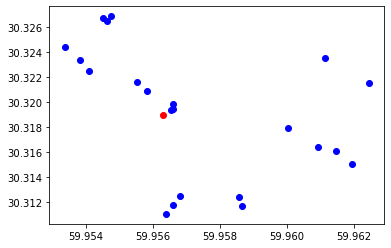

In [14]:
x=st['LATITUDE']
y=st['LONGITUDE']
plt.plot(x, y,'bo')
plt.plot(gorlat,gorlong,'ro')

In [15]:

from sklearn.cluster import KMeans

In [16]:
stch=st.drop(['ID_STOP','STOP_NAME','S'],axis=1)

C:\Users\olya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'optimal k')

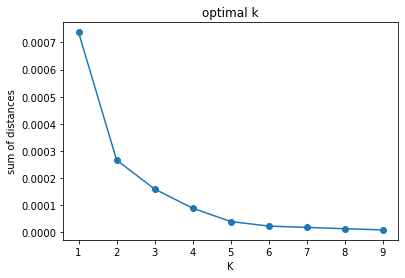

In [17]:
K=range(1,10) 
models=[KMeans(n_clusters=k).fit(stch) for k in K] 
dist=[model.inertia_ for model in models]
OMP_NUM_THREADS=1

plt.plot(K,dist,marker='o')
plt.xlabel('K')
plt.ylabel('sum of distances')
plt.title('optimal k')

In [18]:
model=KMeans(n_clusters=2)

In [19]:
model.fit(stch)

KMeans(n_clusters=2)

In [20]:
model.labels_

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [21]:
model.cluster_centers_

array([[59.95614259, 30.32282198],
       [59.95904754, 30.31386396]])

In [22]:
x1=st[model.labels_==0]['LATITUDE']
y1=st[model.labels_==0]['LONGITUDE']

x2=st[model.labels_==1]['LATITUDE']
y2=st[model.labels_==1]['LONGITUDE']

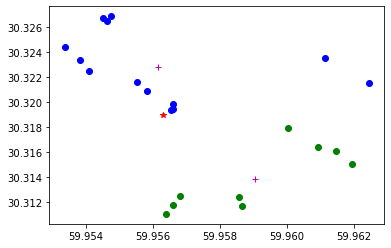

In [23]:
plt.plot(x1, y1,'bo')
plt.plot(x2, y2,'go')
plt.plot(gorlat,gorlong,'r*')
plt.plot(model.cluster_centers_[0,0],model.cluster_centers_[0,1],'m+')
plt.plot(model.cluster_centers_[1,0],model.cluster_centers_[1,1],'m+')

In [24]:
for i in range(2): print("Номер кластера",i,"\n",st[model.labels_==i]['STOP_NAME'])

Номер кластера 0 
 2      Метро "Горьковская" T (6, 40)
3         Троицкая площадь T (6, 40)
4         Троицкая площадь T (6, 40)
5      Метро "Горьковская" Т (6, 40)
8                ТРОИЦКАЯ ПЛ. (тест)
9               ТРОИЦКАЯ ПЛ. (тест)<
12                   М. МОНЕТНАЯ УЛ.
13                   М. МОНЕТНАЯ УЛ.
16           СТ. МЕТРО "ГОРЬКОВСКАЯ"
17       ТРОИЦКАЯ ПЛОЩАДЬ [46А, 49]<
18                      ТРОИЦКАЯ ПЛ.
19           Ст. метро "Горьковская"
21    СТ. МЕТРО "ГОРЬКОВСКАЯ" [46А]<
Name: STOP_NAME, dtype: object
Номер кластера 1 
 0     БОЛЬШАЯ МОНЕТНАЯ УЛ. [46А]
1         Сытный рынок T (6, 40)
6         Сытный рынок T (6, 40)
7         Б. МОНЕТНАЯ УЛ. (тест)
10                  СЫТНЫЙ РЫНОК
11               АВСТРИЙСКАЯ ПЛ.
14         КАМЕННООСТРОВСКИЙ ПР.
15                СЫТНИНСКАЯ УЛ.
20                  СЫТНЫЙ РЫНОК
Name: STOP_NAME, dtype: object


In [25]:
model=KMeans(n_clusters=4)

In [26]:
model.fit(stch)

KMeans(n_clusters=4)

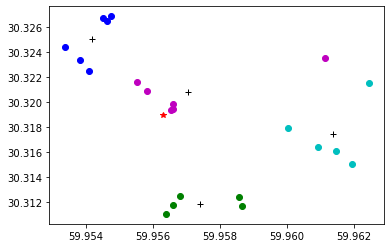

In [27]:
x1=st[model.labels_==0]['LATITUDE']
y1=st[model.labels_==0]['LONGITUDE']

x2=st[model.labels_==1]['LATITUDE']
y2=st[model.labels_==1]['LONGITUDE']

x3=st[model.labels_==2]['LATITUDE']
y3=st[model.labels_==2]['LONGITUDE']

x4=st[model.labels_==3]['LATITUDE']
y4=st[model.labels_==3]['LONGITUDE']

plt.plot(x1, y1,'bo')
plt.plot(x2, y2,'go')
plt.plot(x3, y3,'mo')
plt.plot(x4, y4,'co')
plt.plot(gorlat,gorlong,'r*')

plt.plot(model.cluster_centers_[0,0],model.cluster_centers_[0,1],'k+')
plt.plot(model.cluster_centers_[1,0],model.cluster_centers_[1,1],'k+')
plt.plot(model.cluster_centers_[3,0],model.cluster_centers_[3,1],'k+')
plt.plot(model.cluster_centers_[2,0],model.cluster_centers_[2,1],'k+')

In [28]:
for i in range(4): print("Номер кластера",i,"\n",st[model.labels_==i]['STOP_NAME'])

Номер кластера 0 
 3      Троицкая площадь T (6, 40)
4      Троицкая площадь T (6, 40)
8             ТРОИЦКАЯ ПЛ. (тест)
9            ТРОИЦКАЯ ПЛ. (тест)<
17    ТРОИЦКАЯ ПЛОЩАДЬ [46А, 49]<
18                   ТРОИЦКАЯ ПЛ.
Name: STOP_NAME, dtype: object
Номер кластера 1 
 1     Сытный рынок T (6, 40)
6     Сытный рынок T (6, 40)
10              СЫТНЫЙ РЫНОК
15            СЫТНИНСКАЯ УЛ.
20              СЫТНЫЙ РЫНОК
Name: STOP_NAME, dtype: object
Номер кластера 2 
 2      Метро "Горьковская" T (6, 40)
5      Метро "Горьковская" Т (6, 40)
12                   М. МОНЕТНАЯ УЛ.
16           СТ. МЕТРО "ГОРЬКОВСКАЯ"
19           Ст. метро "Горьковская"
21    СТ. МЕТРО "ГОРЬКОВСКАЯ" [46А]<
Name: STOP_NAME, dtype: object
Номер кластера 3 
 0     БОЛЬШАЯ МОНЕТНАЯ УЛ. [46А]
7         Б. МОНЕТНАЯ УЛ. (тест)
11               АВСТРИЙСКАЯ ПЛ.
13               М. МОНЕТНАЯ УЛ.
14         КАМЕННООСТРОВСКИЙ ПР.
Name: STOP_NAME, dtype: object


In [29]:
stops_coordinates=[]
i = 0
while i < len(st.index):
    stops_coordinates.append({'index': i, 'Coordinates': [st['LATITUDE'][i], st['LONGITUDE'][i]], 'Location': st['STOP_NAME'][i]})
    i += 1

In [30]:
marker_coordinates = [stops['Coordinates'] for stops in stops_coordinates]
marker_coordinates = [[float(x) for x in y] for y in marker_coordinates]

In [31]:
m = Map(center=(gorlat, gorlong), zoom=15)

In [32]:
markers = [Marker(location=(marker_coordinates[i])) for i in range(len(marker_coordinates))]

In [33]:
info_box_template = """
<dl>
<dt>Адрес:</dt><dd>{Location}
</dl>
"""

In [34]:
locations_info  = [info_box_template.format(**point) for point in stops_coordinates]

In [35]:
for i in range(len(markers)):
    markers[i].popup = HTML(locations_info[i])
    m.add_layer(markers[i])

In [36]:
m

Map(center=[59.9563008079342, 30.3189969457719], controls=(ZoomControl(options=['position', 'zoom_in_text', 'z…

In [37]:
new_items=[[gorlat,gorlong]]

In [38]:
model.predict(new_items)

array([2])